# <font color='056938'> **Caso de Estudio** </font>
---


Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install imblearn

In [28]:

import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

### <font color='157699'> **Importación de Librerías** </font>
---

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### <font color='157699'> **Importar Datos** </font>
---

In [30]:
# Lectura de archivo csv
df = pd.read_csv("https://raw.githubusercontent.com/Leostark95/Analitica_II_Proyecto_1/main/data/ecommerce-data.csv", sep=",")

# Obtener los 10 primeros registros
df.head(10)

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [31]:
df.shape

(12330, 18)

## <font color='056938'> **Análisis Exploratorio** </font>
---

In [32]:
# Contar registros únicos en la columna 'Month'
conteo_registros = df['Month'].value_counts()

# Número total de registros en la columna 'Month'
total_registros = df['Month'].count()

print("Número total de registros en la columna 'Month':", total_registros)
print("Conteo de registros únicos por valor en la columna 'Month':")
print(conteo_registros)


Número total de registros en la columna 'Month': 12330
Conteo de registros únicos por valor en la columna 'Month':
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


In [33]:
# Reemplazar los nombres de los meses por números
df['Month'] = df['Month'].replace({
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
})


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

---

In [35]:
df


,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,False,False


In [36]:
columnas_a_convertir = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']

# Convertir las columnas especificadas a tipo objeto
df[columnas_a_convertir] = df[columnas_a_convertir].astype(str)



In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12330 non-null  int64  
 1   Reviews_Duration         12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

### <font color='157699'> **Análisis Univariado** </font>
---

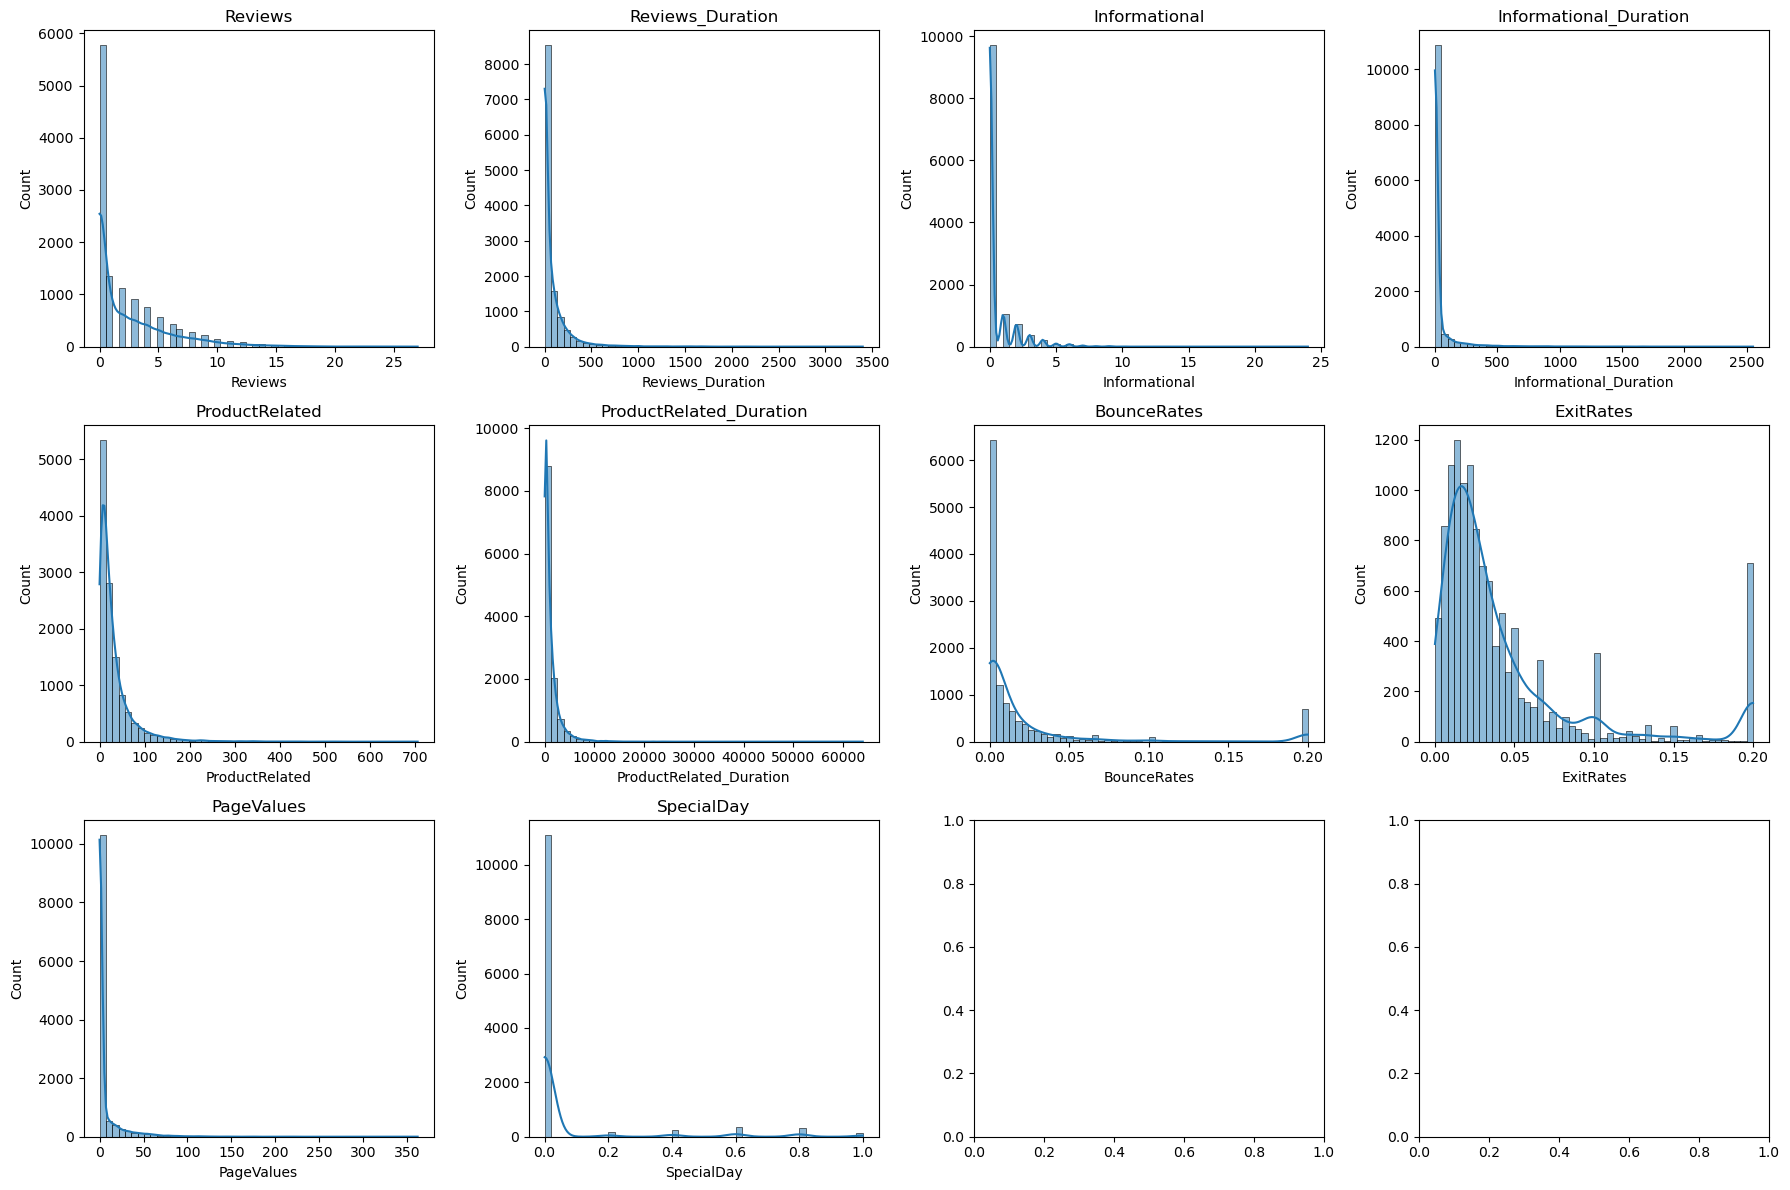

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas que deseas graficar
variables_numericas = ['Reviews', 'Reviews_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Número de filas y columnas para la matriz de subgráficos
num_filas = 3
num_columnas = 4

# Crear la matriz de subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(18, 12))

# Iterar sobre las variables numéricas y graficar histogramas en los subgráficos
for i, variable in enumerate(variables_numericas):
    fila = i // num_columnas
    columna = i % num_columnas
    sns.histplot(df[variable], bins=50, kde=True, ax=axs[fila, columna])
    axs[fila, columna].set_title(variable)

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### <font color='157699'> **Análisis Bivariado** </font>
---

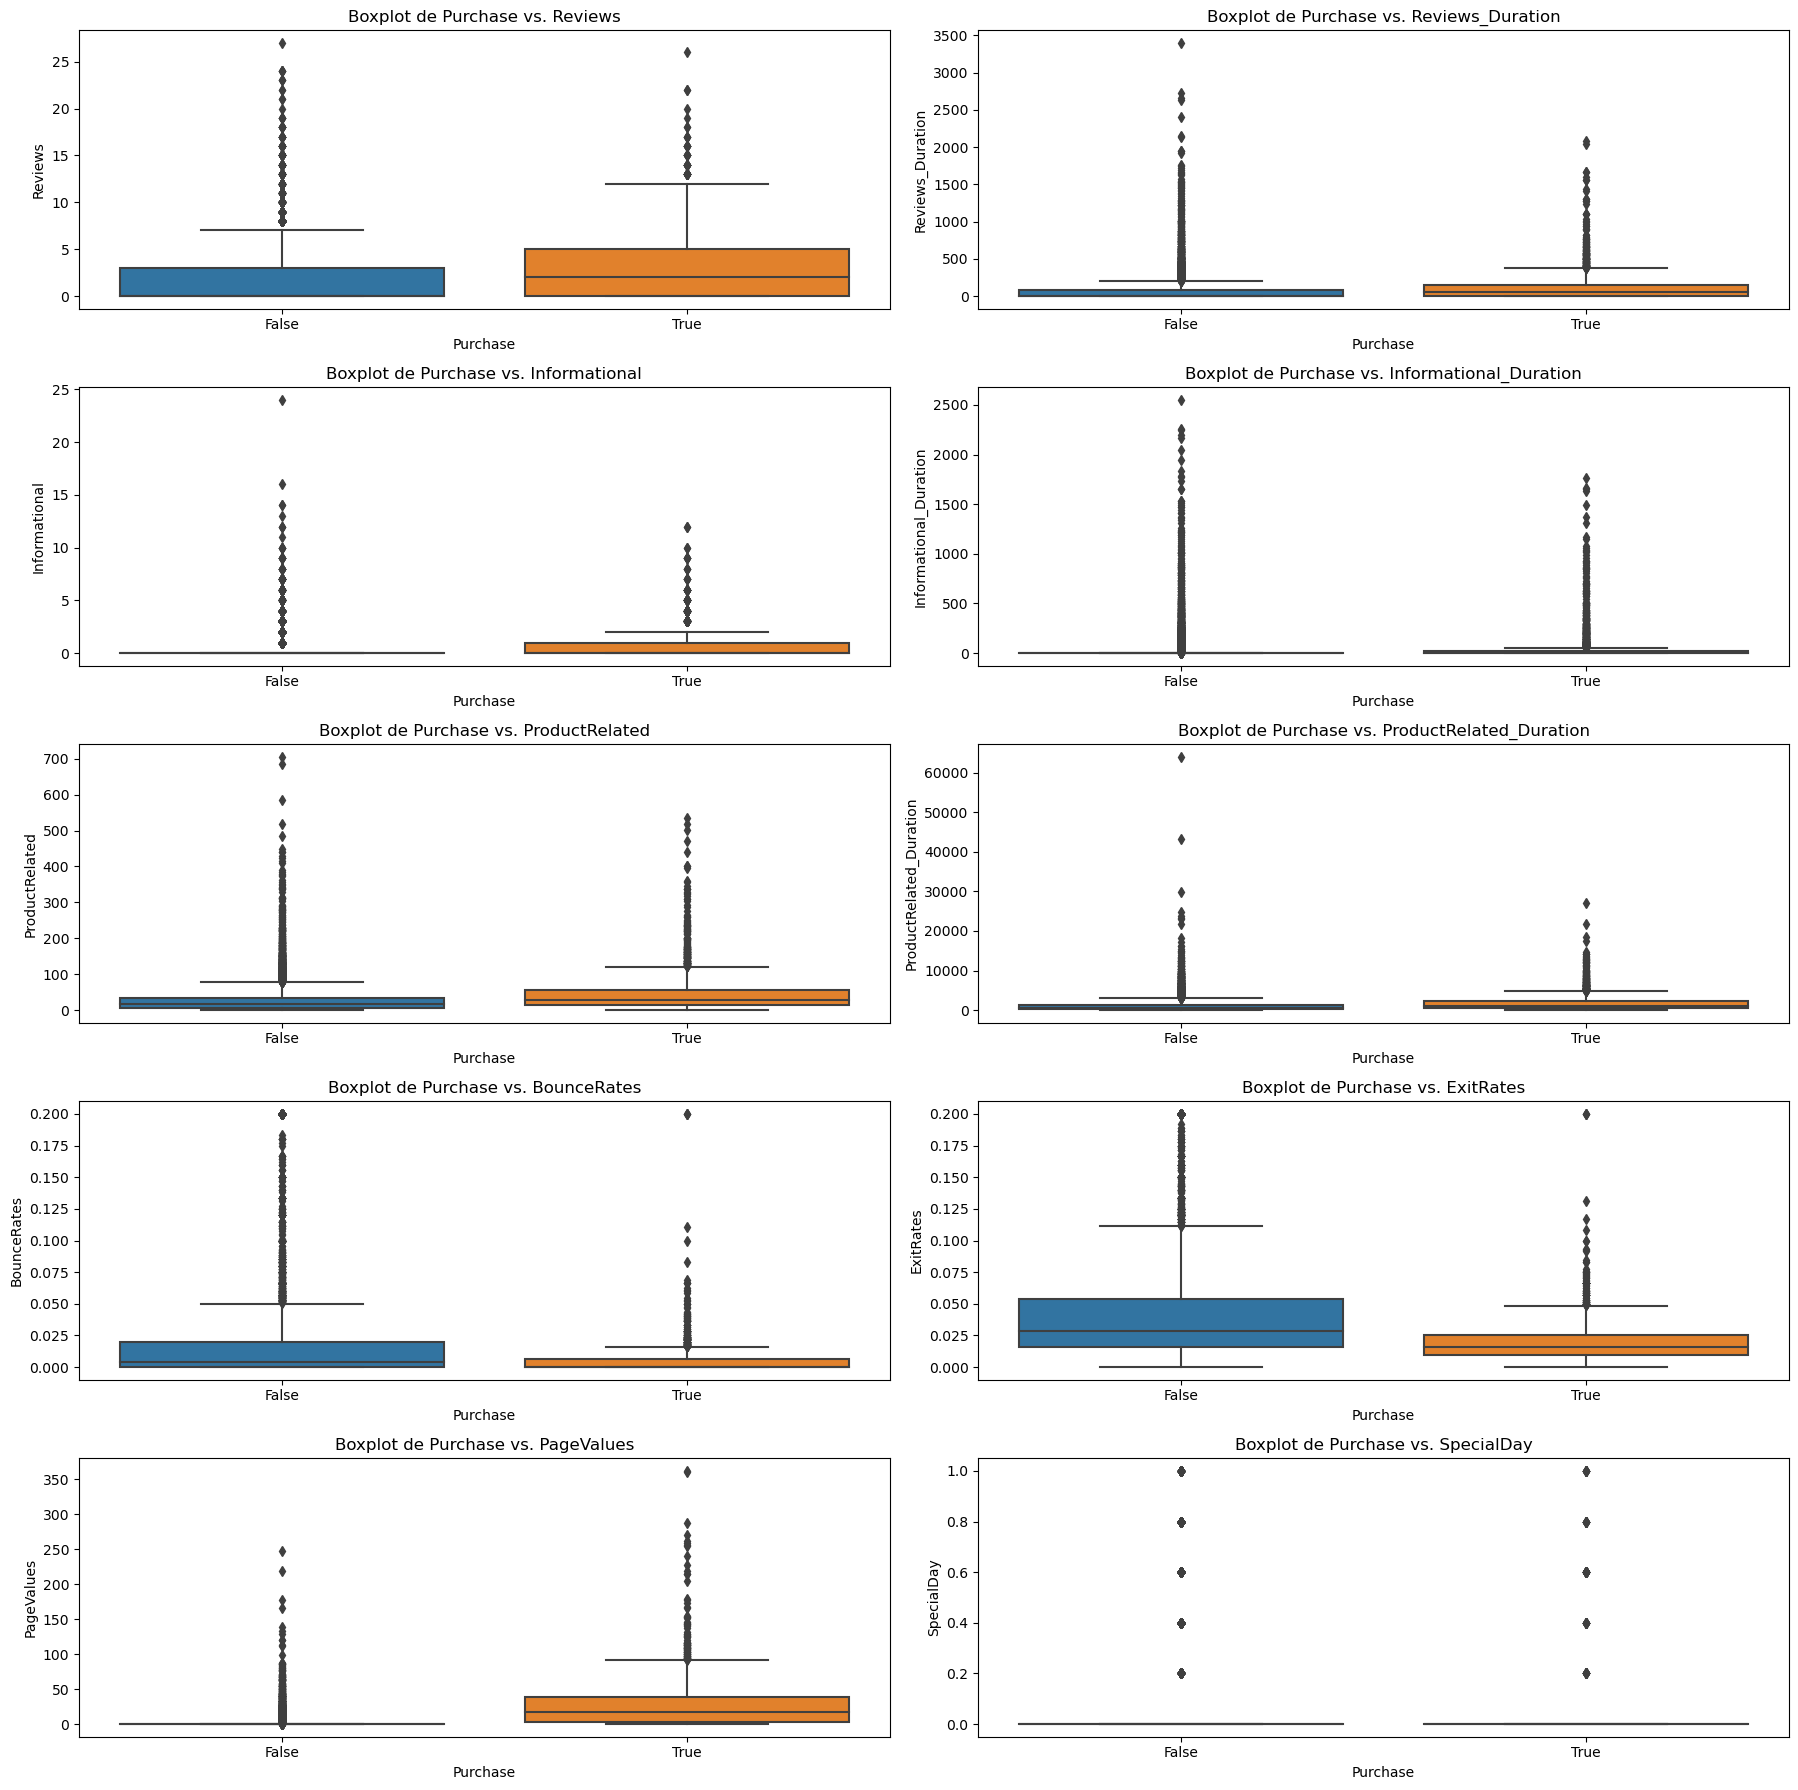

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas que deseas comparar con la variable objetivo "Purchase"
variables_numericas = ['Reviews', 'Reviews_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Número de filas y columnas para la matriz de subgráficos
num_filas = 5
num_columnas = 2

# Crear la matriz de subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(18, 18))

# Iterar sobre las variables numéricas y graficar boxplots comparativos
for i, variable in enumerate(variables_numericas):
    fila = i // num_columnas
    columna = i % num_columnas
    sns.boxplot(x='Purchase', y=variable, data=df, ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Boxplot de Purchase vs. {variable}')

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [40]:
corrmat = df.corr()

C:\Users\cr-19\AppData\Local\Temp\ipykernel_2984\2179290573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

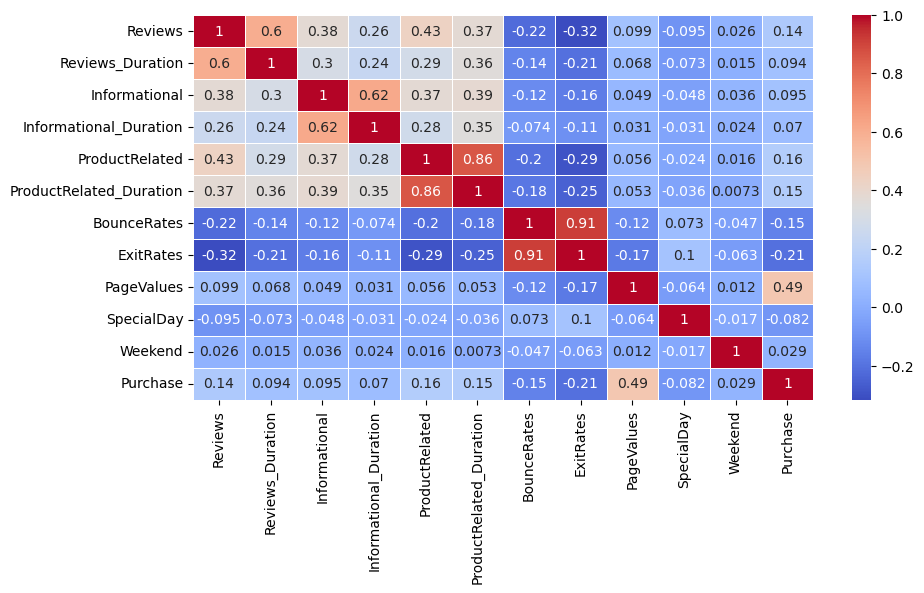

In [41]:
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(corrmat, annot = True, cmap ='coolwarm', linewidths=.5)

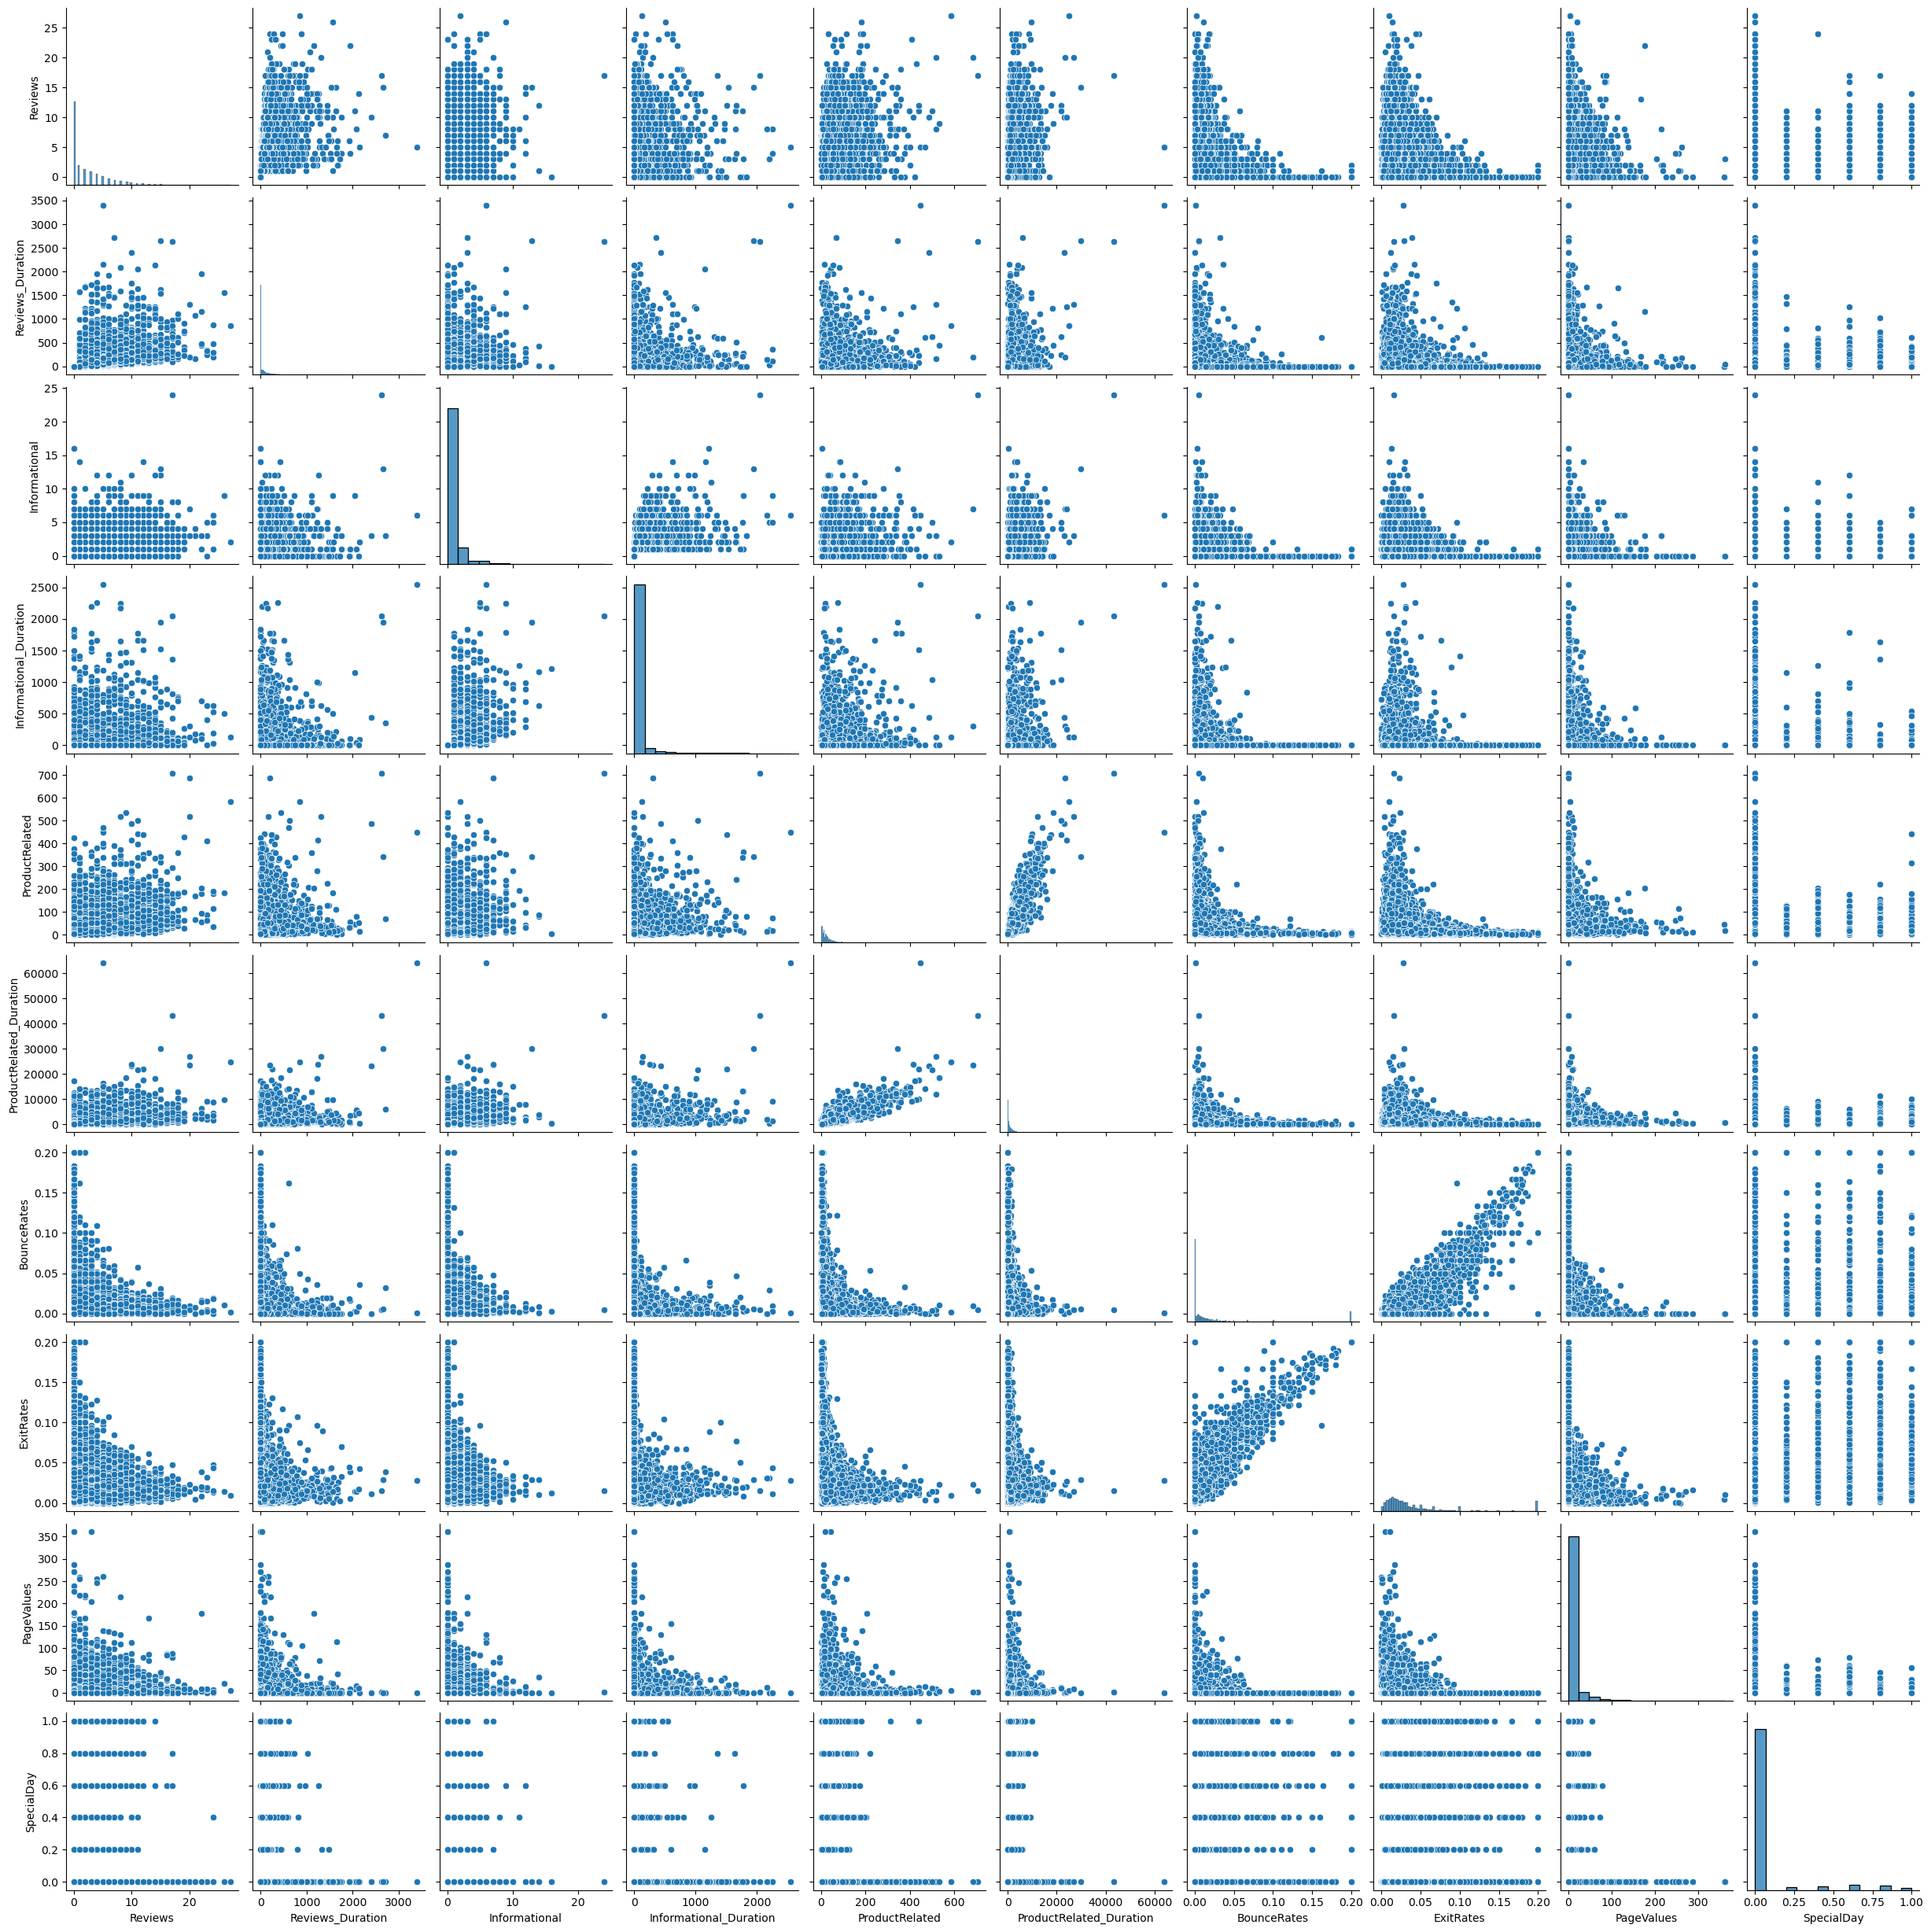

In [42]:
# Obtener solo las variables numéricas del DataFrame
df_numericas = df[['Reviews', 'Reviews_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 
                   'ProductRelated_Duration', 'BounceRates', 
                   'ExitRates', 'PageValues', 'SpecialDay']]

# Crear un gráfico de dispersión con todas las variables numéricas
sns.pairplot(df_numericas)
plt.show()